In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numerik.ode import explicit_runge_kutta, implicit_midpoint_for_system

In [2]:
# define model
g = 9.81
m = 0.05
ks = 0.05
c_a = 0.45
rho = 1.184
r_k = 0.1
A = 0.1**2 * np.pi
ka = 1/2 * c_a * rho * A
fm = m*g

def f(x, y, v0 = 0, ka=ka):
    v_rel = y[1] + v0
    
    return np.array([
        y[1],
        (- ka*v_rel**2*np.sign(v_rel) + fm - ks*y[0]) / m
    ])

def df(x, y, v0 = 0, ka=ka):
    v_rel_der = y[0] + v0
    
    return np.array([
        [
            0, # f1 nach y1
            1, # f1 nach y2
        ],
        [
            -(ks/m), # f2 nach y1
            (ka/m) * (np.abs(v_rel_der) - v_rel_der), # f2 nach y2
        ]
    ])

v0s = np.array([
    0,
    4,
    np.sqrt(ks*m)/ka,
    7,
    np.sqrt(m*g/ka)
])

In [3]:
# simulation paramters
h = 0.25
x_end = 60
x_start = 0
y_start = np.array([0, 0])

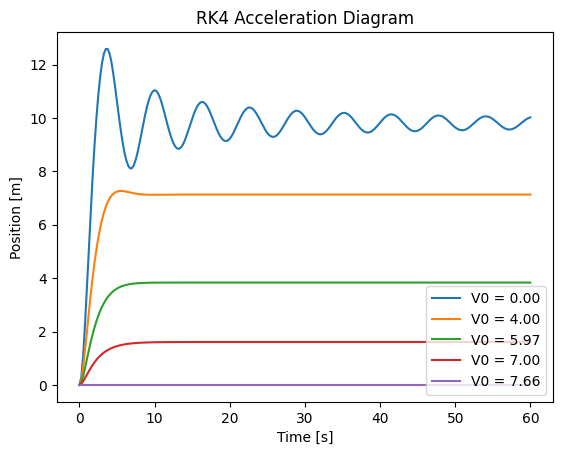

In [4]:
def plot_position_rk(v0 = 0):
    x, y = explicit_runge_kutta(x_end, h, x_start, y_start, lambda x, y: f(x, y, v0=v0))
    plt.plot(x, y[:,0], label=f"V0 = {v0:.2f}")

for v0 in v0s:
    plot_position_rk(v0=v0)

plt.title("RK4 Acceleration Diagram")
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.legend(loc="lower right")
plt.show()

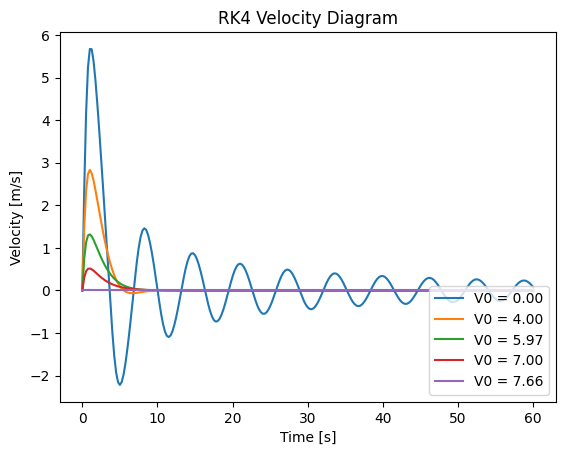

In [5]:
def plot_velocity_rk(v0 = 0):
    x, y = explicit_runge_kutta(x_end, h, x_start, y_start, lambda x, y: f(x, y, v0=v0))
    plt.plot(x, y[:,1], label=f"V0 = {v0:.2f}")
    
for v0 in v0s:
    plot_velocity_rk(v0=v0)

plt.title("RK4 Velocity Diagram")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.legend(loc="lower right")
plt.show()

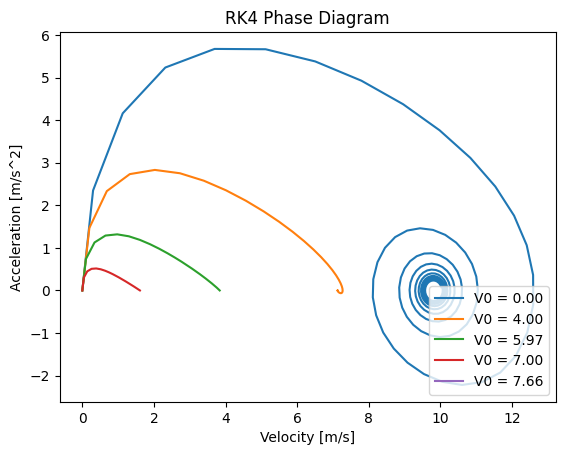

In [6]:
def plot_phase_diagram_rk(v0 = 0):
    x, y = explicit_runge_kutta(x_end, h, x_start, y_start, lambda x, y: f(x, y, v0=v0))
    plt.plot(y[:,0], y[:,1], label=f"V0 = {v0:.2f}")
    
for v0 in v0s:
    plot_phase_diagram_rk(v0=v0)

plt.title("RK4 Phase Diagram")
plt.xlabel("Velocity [m/s]")
plt.ylabel("Acceleration [m/s^2]")
plt.legend(loc="lower right")
plt.show()

In [7]:
def eigenvalue_analysis(v0 = 0):
    x, y = explicit_runge_kutta(60, 0.25, 0, np.array([0, 0]), lambda x, y: f(x, y, v0=v0))
    eigenvalues = np.linalg.eigvals(df(x[-1], y[-1], v0=v0))
    print(f"Eigenvalues for V0={v0:.2f}: {eigenvalues}")

for v0 in v0s:
    eigenvalue_analysis(v0=v0)
    
# Gleichgewichtspunkt ist Grenzstabil

Eigenvalues for V0=0.00: [0.+1.j 0.-1.j]
Eigenvalues for V0=4.00: [0.+1.j 0.-1.j]
Eigenvalues for V0=5.97: [0.+1.j 0.-1.j]
Eigenvalues for V0=7.00: [0.+1.j 0.-1.j]
Eigenvalues for V0=7.66: [0.+1.j 0.-1.j]


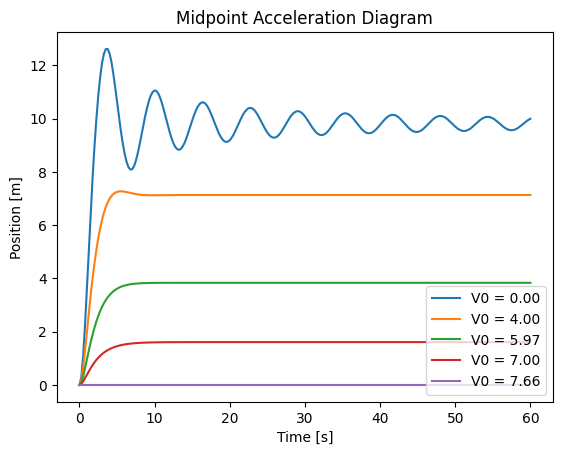

In [8]:
def plot_position_mp(v0 = 0):
    fv = lambda x, y: f(x, y, v0=v0)
    dfv = lambda x, y: df(x, y, v0=v0)
    x, y = implicit_midpoint_for_system(x_end, h, x_start, y_start, fv, dfv)
    plt.plot(x, y[:,0], label=f"V0 = {v0:.2f}")

for v0 in v0s:
    plot_position_mp(v0=v0)

plt.title("Midpoint Acceleration Diagram")
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.legend(loc="lower right")
plt.show()

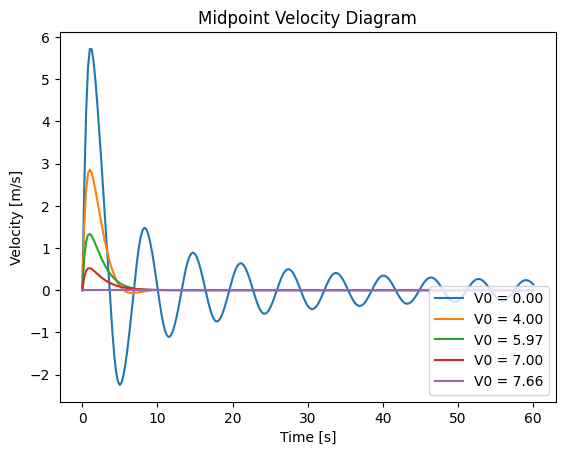

In [9]:
def plot_velocity_mp(v0 = 0):
    fv = lambda x, y: f(x, y, v0=v0)
    dfv = lambda x, y: df(x, y, v0=v0)
    x, y = implicit_midpoint_for_system(x_end, h, x_start, y_start, fv, dfv)
    plt.plot(x, y[:,1], label=f"V0 = {v0:.2f}")
    
for v0 in v0s:
    plot_velocity_mp(v0=v0)

plt.title("Midpoint Velocity Diagram")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.legend(loc="lower right")
plt.show()

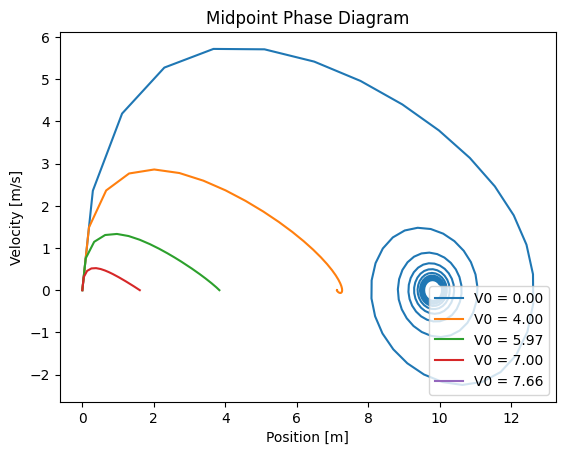

In [10]:
def plot_phase_diagram_mp(v0 = 0):
    fv = lambda x, y: f(x, y, v0=v0)
    dfv = lambda x, y: df(x, y, v0=v0)
    x, y = implicit_midpoint_for_system(x_end, h, x_start, y_start, fv, dfv)
    plt.plot(y[:,0], y[:,1], label=f"V0 = {v0:.2f}")
    
for v0 in v0s:
    plot_phase_diagram_mp(v0=v0)

plt.title("Midpoint Phase Diagram")
plt.xlabel("Position [m]")
plt.ylabel("Velocity [m/s]")
plt.legend(loc="lower right")
plt.show()

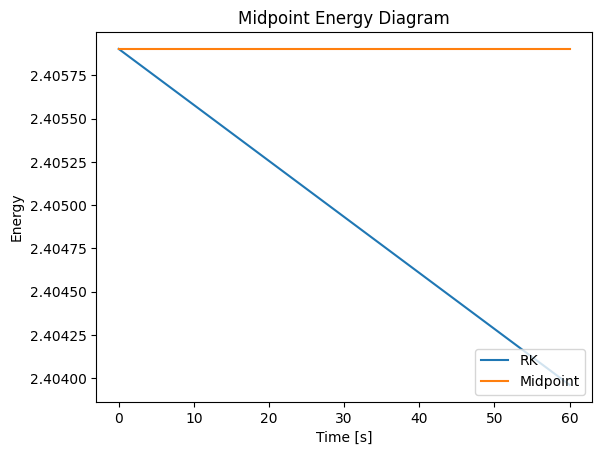

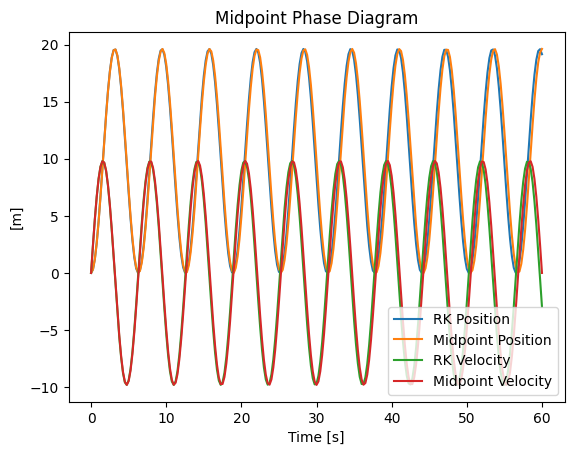

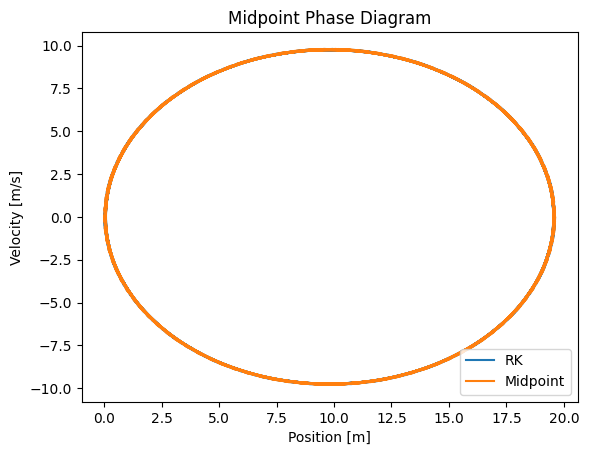

In [14]:
# comparison between methods
fv = lambda x, y: f(x, y, v0=0, ka=0)
dfv = lambda x, y: df(x, y, v0=0, ka=0)

x_rk, y_rk = explicit_runge_kutta(x_end, h, x_start, y_start, fv)
x_mp, y_mp = implicit_midpoint_for_system(x_end, h, x_start, y_start, fv, dfv)

def energy(x, y):
    return (1/2)*ks*(y[:,0]-((m*g)/ks))**2+(1/2)*m*(y[:,1]**2)

plt.plot(x_rk, energy(x_rk, y_rk), label=f"RK")
plt.plot(x_mp, energy(x_mp, y_mp), label=f"Midpoint")
plt.title("Midpoint Energy Diagram")
plt.xlabel("Time [s]")
plt.ylabel("Energy")
plt.legend(loc="lower right")
plt.show()

plt.plot(x_rk, y_rk[:,0], label=f"RK Position")
plt.plot(x_mp, y_mp[:,0], label=f"Midpoint Position")
plt.plot(x_rk, y_rk[:,1], label=f"RK Velocity")
plt.plot(x_mp, y_mp[:,1], label=f"Midpoint Velocity")
plt.title("Midpoint Phase Diagram")
plt.xlabel("Time [s]")
plt.ylabel("[m]")
plt.legend(loc="lower right")
plt.show()

plt.plot(y_rk[:,0], y_rk[:,1], label=f"RK")
plt.plot(y_mp[:,0], y_mp[:,1], label=f"Midpoint")
plt.title("Midpoint Phase Diagram")
plt.xlabel("Position [m]")
plt.ylabel("Velocity [m/s]")
plt.legend(loc="lower right")
plt.show()